# Cancers data

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('https://query.data.world/s/jbmt7fj7rzhveafuakmv77vd4agzyt')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df['diagnosis'].value_counts()
df = df.drop(df.columns[len(df.columns)-1], axis=1) # pour supprimer la derniere colonne
df.drop('id', axis= 1, inplace=True)


In [6]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# La correlation

In [7]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Text(0.5, 1.0, 'Carte de correlation Pearson')

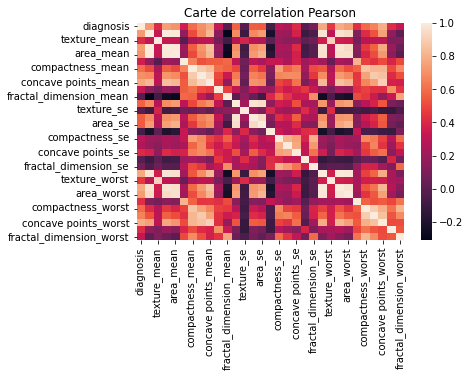

In [8]:
sns.heatmap(df.corr()).set_title('Carte de correlation Pearson')

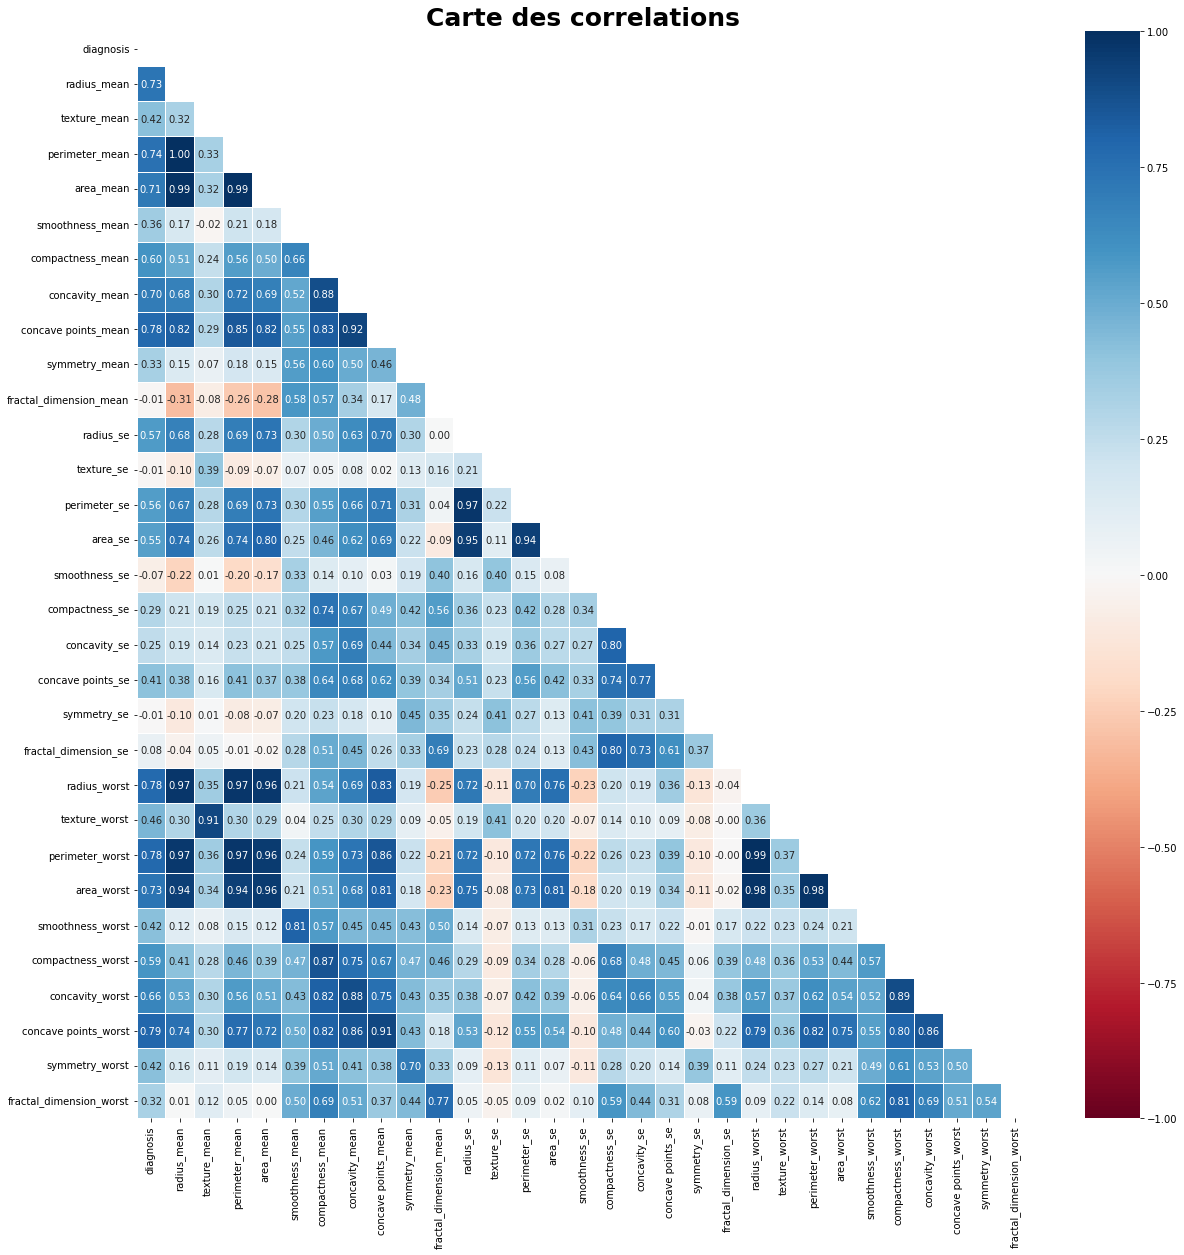

In [9]:
mask = np.triu(np.ones_like(df.corr(), dtype = bool)) # pour masquer la 2ème partie du tableau
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), mask=mask, center= 0, cmap= 'RdBu', linewidths=1, annot=True, fmt= ".2f", vmin=-1, vmax=1)
plt.title('Carte des correlations', fontsize =25, fontweight= "bold")
plt.show()

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Definition d'une nouvelle base pour Classification & prediction

In [11]:
df1 = df[['diagnosis', 'radius_mean', 'perimeter_mean',
       'area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean','radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst','compactness_worst', 'concavity_worst', 'concave points_worst']]

In [12]:
df1

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
567,1,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [15]:
X = df1.drop("diagnosis", axis= 1)
y = df1['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)

## SGDClassifier

In [16]:
model_1 = SGDClassifier()
model_1.fit(X_train, y_train)
score = model_1.score(X_train, y_train)
print("Le score: ", score)
model_1.predict(X_test)

Le score:  0.8309859154929577


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

## Random forest

In [17]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
score = model_2.score(X_train, y_train)
print("Le score: ", score)
pred = model_2.predict(X_test)

Le score:  1.0


In [18]:
model_3 = KNeighborsClassifier()
model_3.fit(X_train, y_train)
score = model_3.score(X_train, y_train)
print("Le score: ", score)
pred = model_3.predict(X_test)

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
model_1.fit(X,y)
model_1.score(X,y)

0.9226713532513181

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
c = SGDClassifier(loss="log", alpha=1)

In [ ]:
c.fit(X_train, y_train)
c.predict_proba(X_test)

array([[0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.71283083e-18],
       [1.00000000e+00, 1.28396408e-20],
       [1.04373583e-01, 8.95626417e-01],
       [1.00000000e+00, 1.47019969e-32],
       [1.00000000e+00, 9.29220311e-19],
       [1.00000000e+00, 5.93634702e-34],
       [1.00000000e+00, 2.31792495e-25],
       [1.00000000e+00, 8.22453278e-16],
       [1.00000000e+00, 3.70339127e-28],
       [9.99967096e-01, 3.29041600e-05],
       [9.99954438e-01, 4.55617898e-05],
       [1.00000000e+00, 9.58037082e-31],
       [1.33008678e-02, 9.86699132e-01],
       [9.99788591e-01, 2.11409074e-04],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.55222431e-24],
       [0.00000000e+00, 1.00000000e+00],
       [2.33100604e-06, 9.99997669e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.98045266e-07, 9.99999002e-01],
       [1.00000000e+00, 2.24034384e-17],
       [1.00000000e+00, 1.60022261e-13],
       [9.926979

In [ ]:
base_model = SGDClassifier()
model = CalibratedClassifierCV(base_model)

model.fit(X_train, y_train)
model.predict_proba(X_test)

array([[0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.62385057, 0.37614943],
       [0.

In [ ]:
c.predict_proba(X)

In [ ]:
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Create classifiers
knc = KNeighborsClassifier()
gnb = GaussianNB()
sgd = SGDClassifier(loss="log", alpha=3)
rfc = RandomForestClassifier()

clf_list = [
    (knc, "KNeighbors Classifier"),
    (gnb, "Naive Bayes"),
    (sgd, "SGD"),
    (rfc, "Random forest"),
]

In [ ]:
from collections import Counter
Counter(y_train)

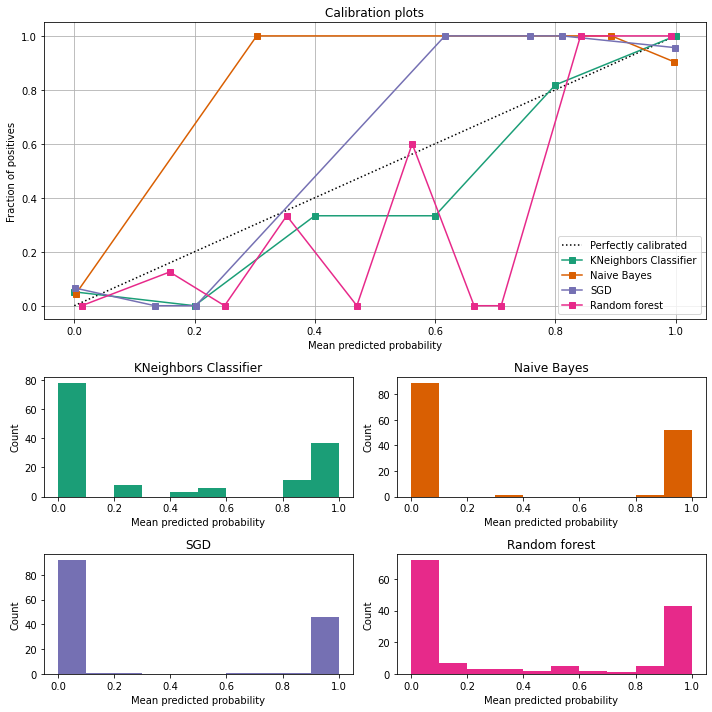

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [ ]:
def Analyse_quantitative(X_train, X_test, y_train, y_test):
    from collections import defaultdict
    from sklearn.metrics import (precision_score,recall_score, f1_score,roc_auc_score,
)

    scores = defaultdict(list)
    for i, (clf, name) in enumerate(clf_list):
        clf.fit(X_train, y_train)
        y_prob = clf.predict_proba(X_test)
        y_pred = clf.predict(X_test)
        scores["Classifier"].append(name)

        for metric in [precision_score, recall_score, f1_score, roc_auc_score]:
            score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
            scores[score_name].append(metric(y_test, y_pred))

        score_df = pd.DataFrame(scores).set_index("Classifier")
        score_df.round(decimals=3)

    return score_df


In [ ]:
Analyse_quantitative(X_train, X_test, y_train, y_test)

,Precision,Recall,F1,Roc auc
Classifier,,,,
KNeighbors Classifier,0.888889,0.905660,0.897196,0.919497
Naive Bayes,0.905660,0.905660,0.905660,0.925052
SGD,0.976744,0.792453,0.875000,0.890671
Random forest,0.924528,0.924528,0.924528,0.940042
